<a href="https://colab.research.google.com/github/RamomNF/GoogleColab/blob/master/TemporadasAnimacao/series_temporais_animacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#'Após fazer um curso de séries temporais e refrescar na memória os conceitos aprendidos na faculdade
#'resolvi pegar uns dados na internet e colocar os conhecimentos em prática.
#'Web Scrapping para os dados: https://github.com/RamomNF/GoogleColab/blob/master/TemporadasAnimacao/web_scrapping_animacao.ipynb
#'Publicação no Medium: https://medium.com/@ramomnf/evolu%C3%A7%C3%A3o-das-temporadas-de-anime-ao-longo-do-tempo-1c2c3eea205b

In [ ]:
#Biliotecas utilizadas

#install.packages('rio')
#install.packages('tidyverse')
#install.packages('forecast')
#install.packages('seasonal')
#install.packages('ggpubr')

library("rio")
library("tidyverse")
library("magrittr")
library("forecast")
library("seasonal")
library('ggpubr')


Attaching package: ‘ggpubr’


The following object is masked from ‘package:forecast’:

    gghistogram




In [ ]:
#####################################################################
#                                                                   #
###                                                               ###
#####            BLOCO 01: Preparação da Série Temporal         #####
###                                                               ###
#                                                                   #
#####################################################################

In [ ]:
#Importando os dados com o canivete suiço 'rio'
dataf = rio::import("https://raw.githubusercontent.com/RamomNF/GoogleColab/master/TemporadasAnimacao/data_seasons.csv")

In [ ]:
#'Eu que coletei os dados, então já conheço bem.
#'Vou apenas confirmar se as variáveis foram importadas com o tipo correto
#'e se tem algo faltando.
dataf %>% glimpse()
dataf %>% is.na() %>% summary()

Rows: 2,633
Columns: 4
$ names   <chr> "Slayers", "Tenchi Universe", "H2", "Jurassic Tripper", "Stre…
$ ratings <dbl> 4.1, 4.0, 3.7, 3.6, 3.4, 3.3, 2.9, 2.8, 2.6, 2.4, 3.8, 3.1, 4…
$ season  <chr> "spring", "spring", "spring", "spring", "spring", "spring", "…
$ year    <int> 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1…


   names          ratings          season           year        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:2633      FALSE:2633      FALSE:2633      FALSE:2633     

In [ ]:
#'Quero saber quantas animações foram coletadas por temporada.
#'Os dois primeiros anos (95 e 96) tem poucas animações com notas.
#'A nota no outono de 2020 é referente a uma animação que teve estreia antecipada online
dataf %>%
  group_by(year, season) %>% 
  summarise(n = n()) %>%
  arrange(n) #%>% View()

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,season,n
<int>,<chr>,<int>
1996,fall,1
2020,fall,1
1995,summer,2
1996,spring,4
1996,summer,5
1997,winter,5
2000,summer,5
1995,winter,6
1997,summer,6


In [ ]:
#Q1 winter
#Q2 spring
#Q3 summer
#Q4 fall
new_data10 = dataf %>%
  group_by(year, season) %>%
  top_n(10, wt = ratings) %>% 
  summarise(score = mean(ratings, na.rm=TRUE)) %>% 
  mutate(timeline = case_when(season == "spring" ~ 0.25,
                              season == "summer"   ~ 0.50,
                              season == "fall" ~ 0.75,
                              TRUE ~ 0) + year) %>% 
  arrange(timeline) %>% 
  filter(timeline >= 1997) #poucas obs antes disso

`summarise()` regrouping output by 'year' (override with `.groups` argument)



In [ ]:
#Criando a série
asts_10 = 
  new_data10$score %>%
  ts(start = 1997, end = c(2020, 3), frequency = 4)

In [ ]:
#####################################################################
#                                                                   #
###                                                               ###
#####   BLOCO 02: Avaliando características da Série Temporal   #####
###                                                               ###
#                                                                   #
#####################################################################

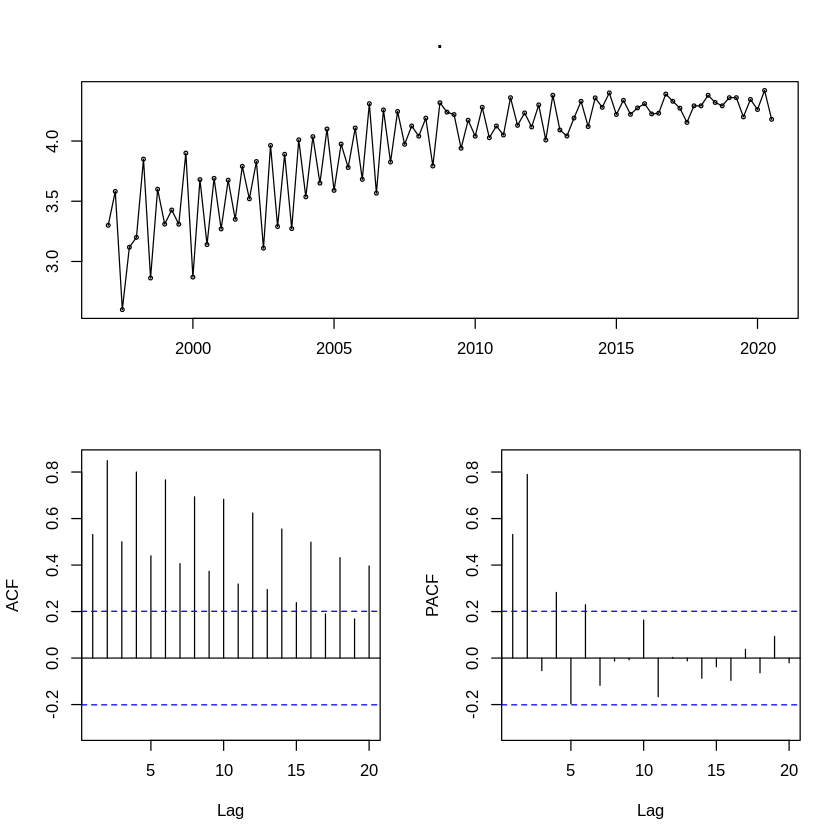

In [ ]:
#'Hora de dar uma analisada inicial na série.
#'Claramente existe tendência na série.
#'A variabilidadeparece estar diminuindo.
asts_10 %>% tsdisplay()

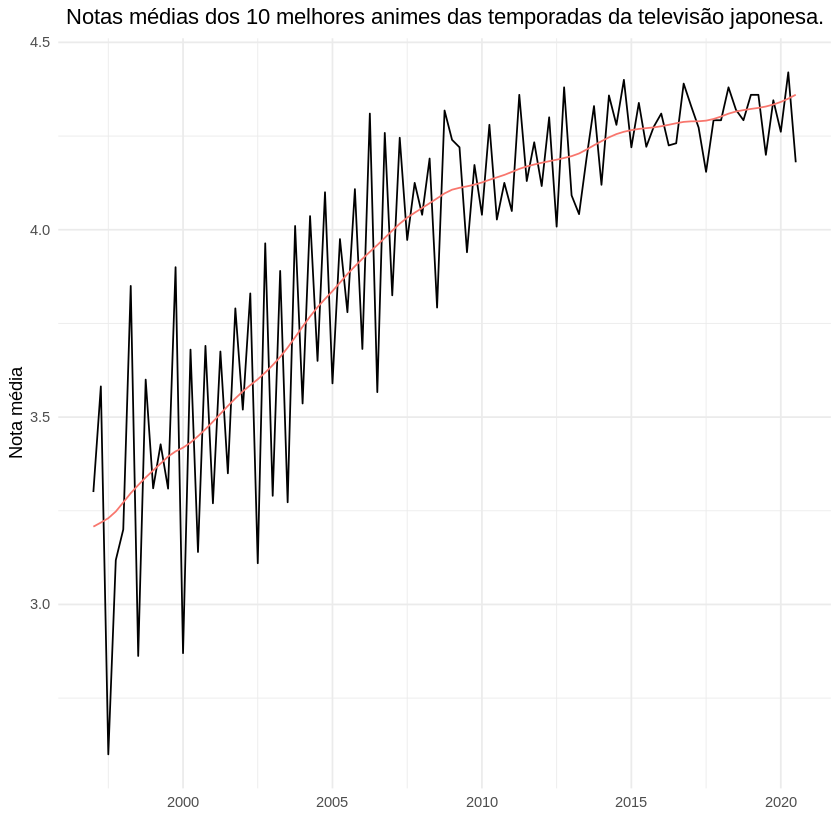

In [ ]:
#'O gráfico da série mostra uma tendência de crescimento na nota média, ou seja, 
#'tudo indica que o público tem considerado que de 1997 para cá as temporadas de animes 
#'estão melhores.
autoplot(asts_10) +
  autolayer(asts_10 %>% seas() %>% trendcycle()) +
  xlab("") + ylab("Nota média") +
  ggtitle("Notas médias dos 10 melhores animes das temporadas da televisão japonesa.") +
  theme_minimal() +
  theme(legend.position = 'none',
        plot.title = element_text(hjust = 0.5))

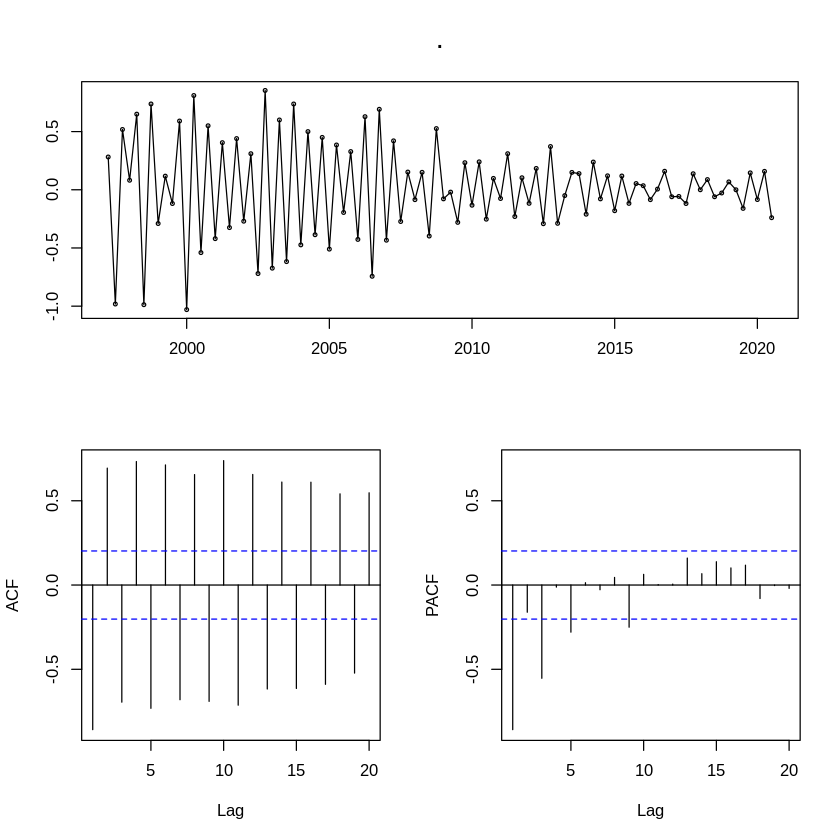

In [ ]:

#Avaliando a heterocedasticidade
asts_10 %>% diff() %>% tsdisplay()


In [ ]:
#Vou ilustrar a heterocedasticidade com ajuda de retas

#Primeiro a reta inferior
heterolow = log(asts_10) %>% diff() %>% exp()
heterolow = heterolow[c(2, 6, 12, 22, 24, 26, 28, 32, 38, 62, 64, 90, 92, 94)]
heterolt  = new_data10$timeline[c(2, 6, 12, 22, 24, 26, 28, 32, 38, 62, 64, 90, 92, 94)]
heterolt[1] = 1997.0

#Depois a reta superior
heterohigh = log(asts_10) %>% diff() %>% exp()
heterohigh = heterohigh[c(1, 7, 13, 23, 27, 39, 47, 63, 69, 79, 93)]
heteroht   = new_data10$timeline[c(1, 7, 13, 23, 27, 39, 47, 63, 69, 79, 93)]
heteroht[length(heteroht)] = 2020.25

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



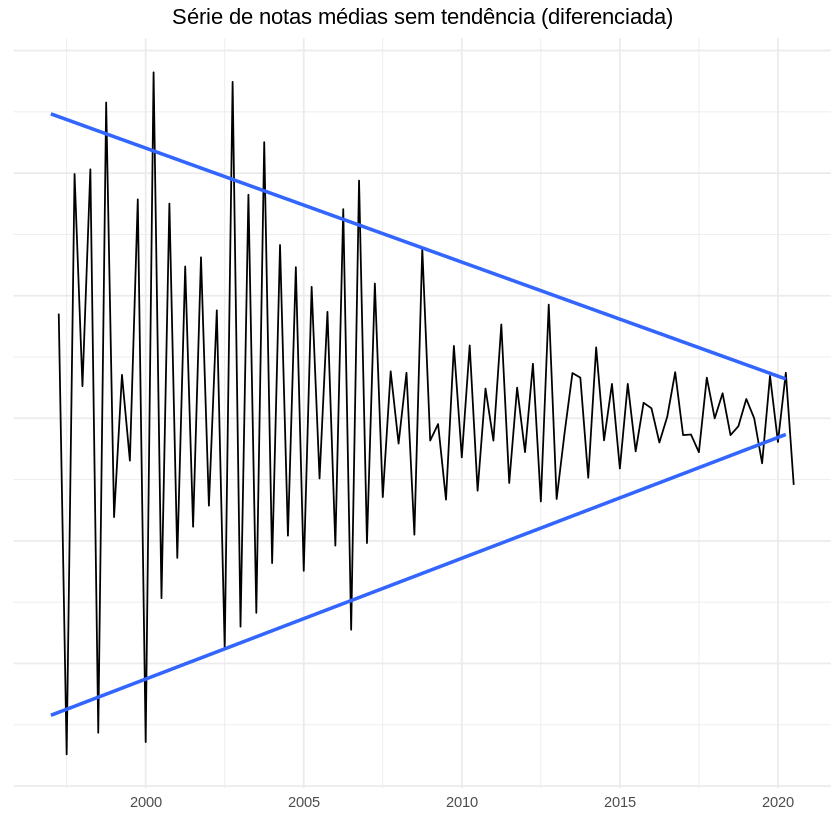

In [ ]:
#Unindo as retas e a série diferenciada em um único gráfico
log(asts_10) %>% diff() %>% exp() %>% autoplot() +
  xlab("") +
  ggtitle("Série de notas médias sem tendência (diferenciada)") +
  theme_minimal() +
  theme(legend.position = 'none',
        plot.title   = element_text(hjust = 0.5),
        axis.title.y = element_blank(),
        axis.text.y  = element_blank()) +
  geom_smooth(data = data.frame(heterolow, heterolt),
              aes(x=heterolt,y=heterolow),
              se = FALSE, method = "lm")+
  geom_smooth(data = data.frame(heterohigh, heteroht),
              aes(x=heteroht,y=heterohigh),
              se = FALSE, method = "lm")

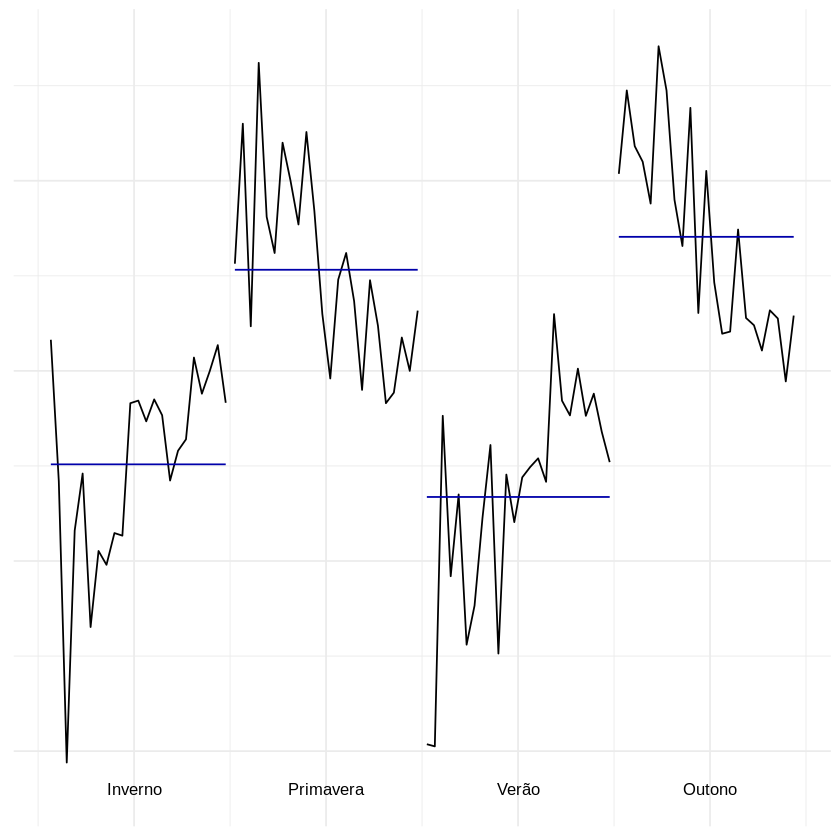

In [ ]:
#'Por conta da tendência e da heterocedasticidade fica mais difícil visualizar a sazonalidade
#'dois gráficos da série diferenciada, no primeiro vemos que as temporadas de primavera e 
#'outono costumam ser mais bem avaliadas
saz_temp <- ggmonthplot(diff(asts_10))+ 
  annotate(geom = "text", x = 1.5, y = -1.1, label = 'Inverno',   size = 3.5 ) +
  annotate(geom = "text", x = 2.5, y = -1.1, label = 'Primavera', size = 3.5 ) +
  annotate(geom = "text", x = 3.5, y = -1.1, label = 'Verão',     size = 3.5 ) +
  annotate(geom = "text", x = 4.5, y = -1.1, label = 'Outono',    size = 3.5 ) +
  theme_minimal() +
  theme(legend.position = 'none',
        plot.title = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank())

saz_temp

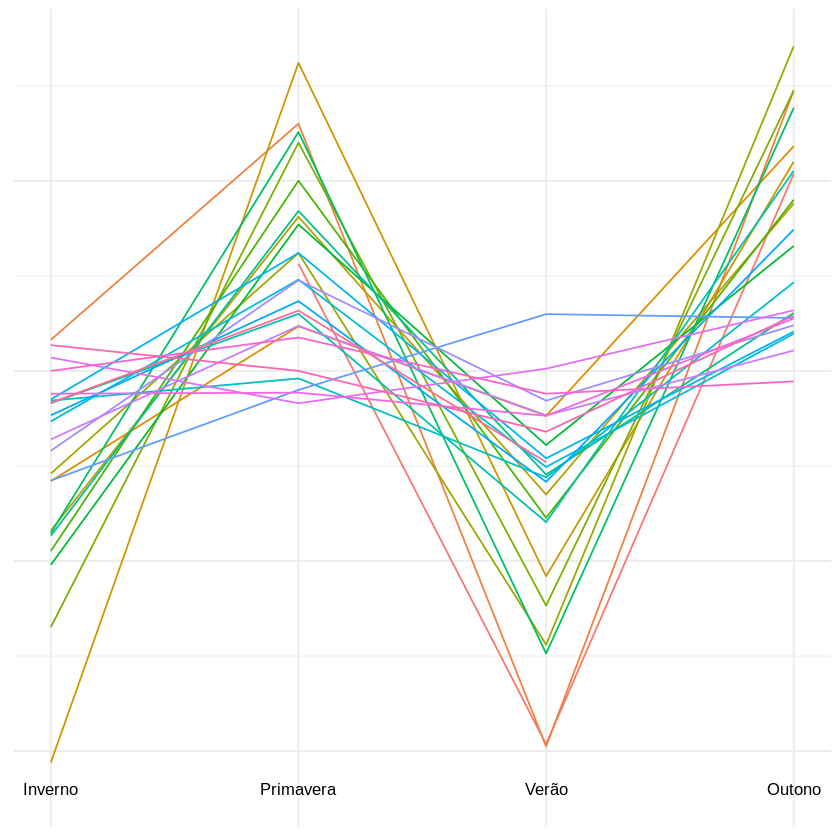

In [ ]:
saz_serie <- ggseasonplot(diff(asts_10), year.labels = FALSE)+
  annotate(geom = "text", x = 0,    y = -1.1, label = 'Inverno',   size = 3.5 ) +
  annotate(geom = "text", x = 0.25, y = -1.1, label = 'Primavera', size = 3.5 ) +
  annotate(geom = "text", x = 0.5,  y = -1.1, label = 'Verão',     size = 3.5 ) +
  annotate(geom = "text", x = 0.75, y = -1.1, label = 'Outono',    size = 3.5 ) +
  theme_minimal() +
  theme(legend.position = 'none',
        plot.title = element_blank(),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.title.x = element_blank(),
        axis.text.x = element_blank())

saz_serie

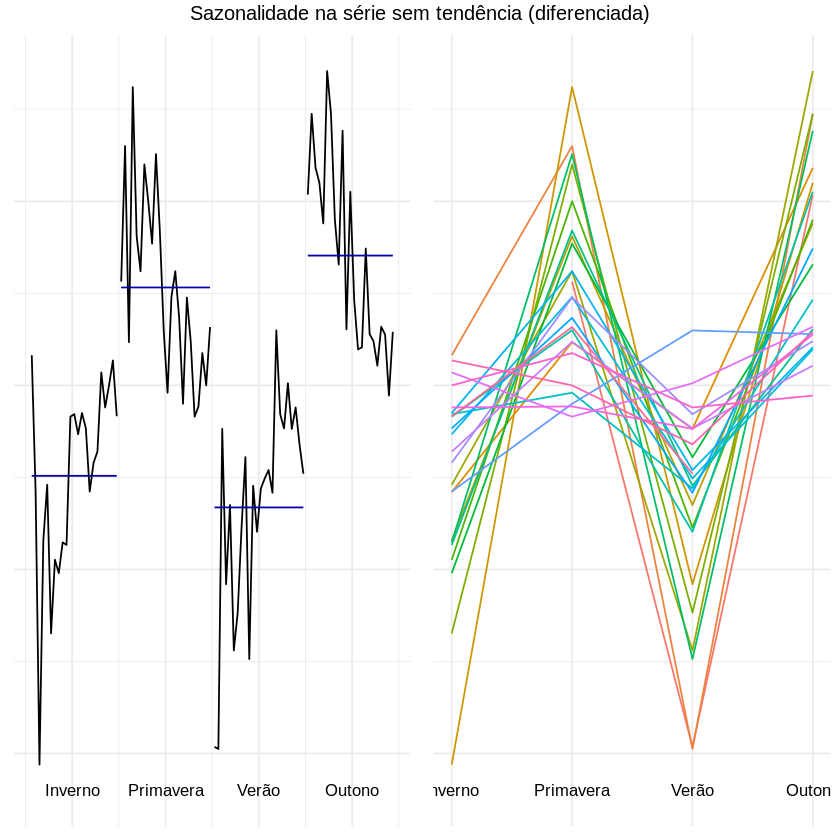

In [ ]:
#lado a lado
ggpubr::ggarrange(saz_temp, saz_serie, nrow=1) %>% 
  annotate_figure(top = "Sazonalidade na série sem tendência (diferenciada)")

In [ ]:
#####################################################################
#                                                                   #
###                                                               ###
#####        BLOCO 03: Comparando desempenho dos modelos        #####
###                                                               ###
#                                                                   #
#####################################################################

In [ ]:
#Separando um conjunto de treino
#Treino com 85% inicial e teste com 15% final

train = asts_10 %>% window(end=2016.9)
h = length(asts_10) - length(train)

In [ ]:
#'4 Modelos:
#'Modelo ARIMA com sazonalidade (SARIMA)
#'Modelo de suavização exponencial com decomposição em tendência, sazonalidade e erro (ETS)
#'Modelo de suavização exponencial com transformada de Fourier e transformação Box-Cox (TBATS)
#'Modelo autoregressivo de redes neurais (NNAR)

In [ ]:
#'Selecionei manualmente vários modelos SARIMA candidatos cuja autocorrelação dos erros ficaram
#'baixas e bonitas e comparei com o benchmark (resultado do auto.arima), como o modelo automático
#'ficou com os erros igualmente bons e menor AICc, optei por seguir com o modelo automático SARIMA(0,1,3)(0,1,1).
#'Os demais modelos também ficaram no automático

ETS    <- forecast( ets(train), h=h)
SARIMA <- forecast( Arima(train, order = c(0,1,3), seasonal = c(0,1,1)), h=h)
NNAR   <- forecast( nnetar(train), h=h)
TBATS  <- forecast( tbats(train, biasadj=TRUE), h=h)

Combination <- (ETS[["mean"]] + SARIMA[["mean"]] + NNAR[["mean"]] + TBATS[["mean"]])/4

In [ ]:
#'Acurácio dos 4 e da combinação dos 4.
#'A combinação dos 4 modelos apresentou maior acurácia.

c(ETS        = accuracy(ETS, asts_10)[   "Test set","RMSE"],
  SARIMA     = accuracy(SARIMA, asts_10)["Test set","RMSE"],
  NNAR       = accuracy(NNAR, asts_10)[  "Test set","RMSE"],
  TBATS      = accuracy(TBATS, asts_10)[  "Test set","RMSE"],
  COMBINAÇÃO = accuracy(Combination, asts_10)["Test set","RMSE"])


ETS     SARIMA       NNAR      TBATS COMBINAÇÃO 
0.08178734 0.08414232 0.08350953 0.07160826 0.06769401

In [ ]:
#####################################################################
#                                                                   #
###                                                               ###
#####                    BLOCO 04: Previsão                     #####
###                                                               ###
#                                                                   #
#####################################################################

In [ ]:
#'Finalmente chegou a hora da previsão, nesse caso os intervalos de 
#'confiança não são de interesse, então calculei o valor médio da previsão
#'para as próximas quatro temporadas. Daqui uns meses descubro quão próximo cheguei!


h = 4 
ETS <- forecast(ets(asts_10), h=h)
SARIMA <- forecast( Arima(asts_10, order = c(0,1,3), seasonal = c(0,1,1)), h=h)
NNAR <- forecast(nnetar(asts_10), h=h)
TBATS <- forecast(tbats(asts_10, biasadj=TRUE), h=h, level=95)
Combination <- (ETS[["mean"]] + SARIMA[["mean"]] + NNAR[["mean"]] + TBATS[["mean"]])/4

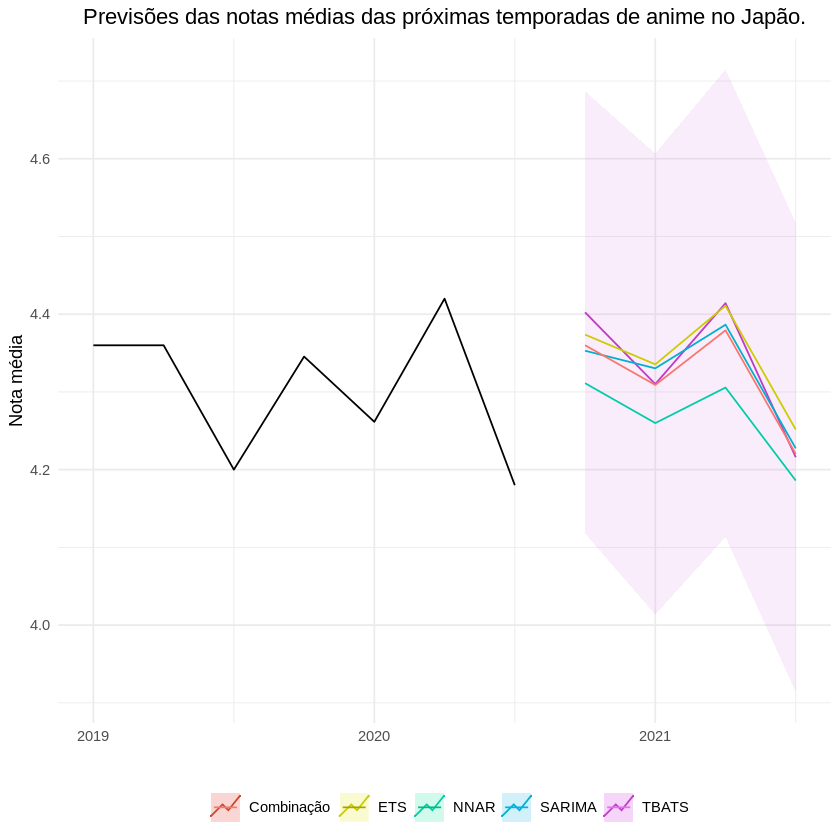

In [ ]:
autoplot(window(asts_10, start = 2019)) +
  autolayer(TBATS, series="TBATS", PI=TRUE, alpha = 0.15) +
  autolayer(TBATS, series="TBATS", PI=FALSE) +
  autolayer(ETS, series="ETS", PI=FALSE) +
  autolayer(SARIMA, series="SARIMA", PI=FALSE) +
  autolayer(NNAR, series="NNAR", PI=FALSE) +
  autolayer(Combination, series="Combinação") +
  xlab("") + ylab("Nota média") +
  ggtitle("Previsões das notas médias das próximas temporadas de anime no Japão.", ) +
  theme_minimal() +
  theme(legend.position="bottom",
        legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5))

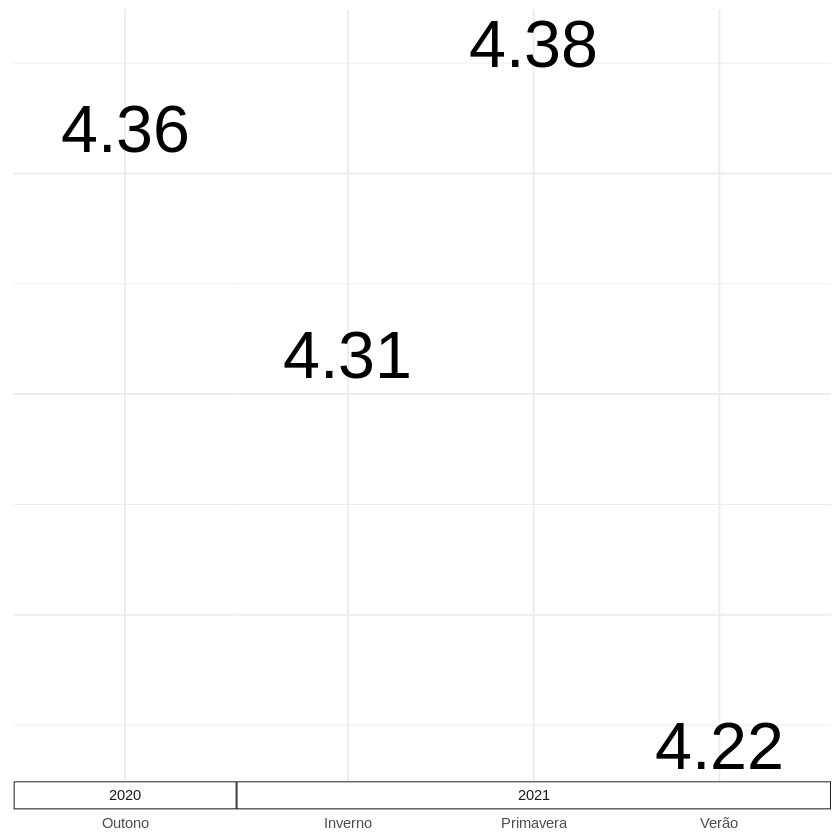

In [ ]:
data.frame(rating=as.numeric(Combination),
           year=c(2020, 2021, 2021, 2021), 
           season = c('Outono', 'Inverno', 'Primavera', 'Verão')) %>% 
  ggplot(aes(x = season, 
             y = rating)) +
  geom_text(aes(label=round(rating, 2)),hjust=0.5, vjust=0.5, size = 14) +
  facet_grid(~ year, space="free_x", scales="free_x", switch="x") +
  theme_minimal() +
  theme(panel.spacing=unit(0,"cm"),
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_rect(linetype = 'solid'))